In [51]:
# Load libraries
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('diabetes.csv')

# Separating input and output
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df[['Outcome']].values

# Standardization of features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Create a support vector machine with a radial basis function kernel
svc_rbf = SVC(kernel='rbf', random_state=0, gamma=1e-2, C=1)

model = svc_rbf.fit(x, y)

model.n_support_

array([224, 225], dtype=int32)

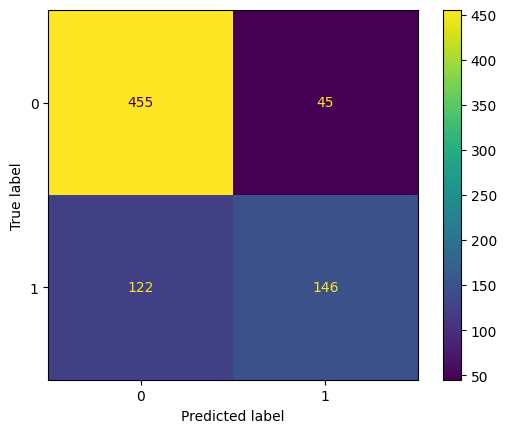

In [52]:
# Plot a heatmap of the confusion matrix
y_pred = model.predict(x)
matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()


In [53]:
# Accuracy score of Logistic Regression algorithm 
accuracy_logistic = np.array([0.77272727, 0.74675325, 0.75324675, 0.81045752, 0.77777778])
print("Accuracy of Logistic Regression: mean =", accuracy_logistic.mean())

# Accuracy score of SVM algorithm with 'rbf' kernel
accuracy_svm = cross_val_score(svc_rbf, x, y, scoring="accuracy")
print("Accuracy score of SVM(kernel = 'rbf'): mean =", accuracy_svm.mean())

# Accuracy score of SVM algorithm with 'poly' kernel
svc_poly = SVC(kernel='poly', random_state=0, gamma='scale', C=1)
accuracy_svm = cross_val_score(svc_poly, x, y, scoring="accuracy")
print("Accuracy score of SVM(kernel = 'poly'): mean =", accuracy_svm.mean())

# Accuracy score of SVM algorithm with 'sigmoid' kernel
svc_sigmoid = SVC(kernel='sigmoid', random_state=0, gamma=1e-2, C=1)
accuracy_svm = cross_val_score(svc_sigmoid, x, y, scoring="accuracy")
print("Accuracy score of SVM(kernel = 'sigmoid'): mean =", accuracy_svm.mean())

# Accuracy score of SVM algorithm with 'linear' kernel
svc_linear = SVC(kernel='linear', random_state=0, gamma='scale', C=1)
accuracy_svm = cross_val_score(svc_linear, x, y, scoring="accuracy")
print("Accuracy score of SVM(kernel = 'linear'): mean =", accuracy_svm.mean())

Accuracy of Logistic Regression: mean = 0.772192514
Accuracy score of SVM(kernel = 'rbf'): mean = 0.7773703420762244
Accuracy score of SVM(kernel = 'poly'): mean = 0.7487140310669723
Accuracy score of SVM(kernel = 'sigmoid'): mean = 0.774755962991257
Accuracy score of SVM(kernel = 'linear'): mean = 0.7734827264239028


In [54]:
# Recall score
recall_svm = cross_val_score(model, x, y, scoring="recall")
print("Recall score for SVM: mean =", recall_svm.mean())

Recall score for SVM: mean = 0.5410202655485674


In [55]:
# Precision score
precision_svm = cross_val_score(model, x, y, scoring="precision")
print("Precision score for SVM: mean =", precision_svm.mean())

Precision score for SVM: mean = 0.7565584845764016


In [56]:
# F1 score 
f1_svm = cross_val_score(model, x, y, scoring="f1")
print("F1 score for SVM: mean =", f1_svm.mean())

F1 score for SVM: mean = 0.6293336407407228


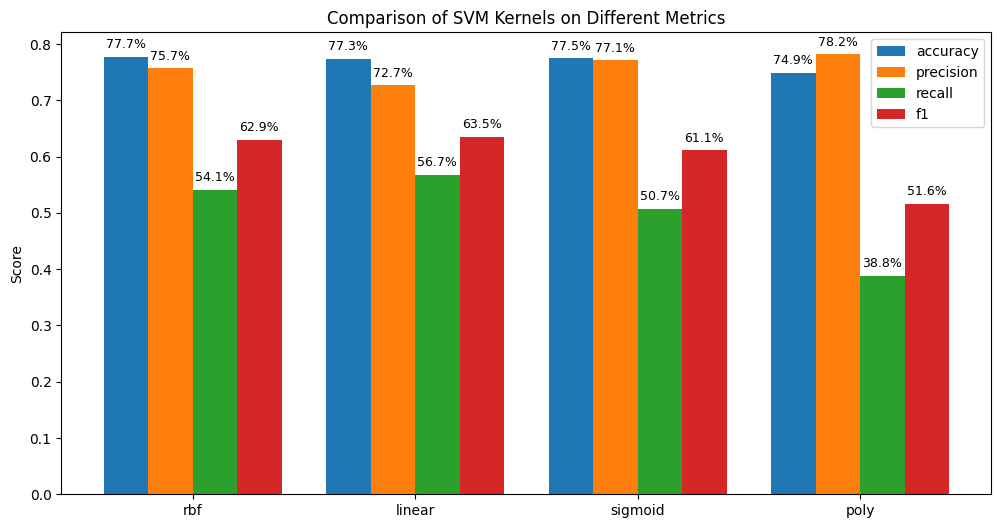

In [58]:
# kernels and models lists 
kernels = ["rbf", "linear", "sigmoid", "poly"]
models = [svc_rbf, svc_linear, svc_sigmoid, svc_poly]

# metrics
metrics = ["accuracy", "precision", "recall", "f1"]
results = {m: [] for m in metrics}

# Calculate averages
for model in models:
    for m in metrics:
        score = cross_val_score(model, x, y, cv=5, scoring=m).mean()
        results[m].append(score)

# Draw diagram
x = np.arange(len(kernels))
bar_width = 0.2

plt.figure(figsize=(12,6))

for i, m in enumerate(metrics):
    bars = plt.bar(x + i*bar_width, results[m], width=bar_width, label=m)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                 f"{height*100:.1f}%", ha='center', va='bottom', fontsize=9)

plt.xticks(x + bar_width*1.5, kernels)
plt.ylabel("Score")
plt.title("Comparison of SVM Kernels on Different Metrics")
plt.legend()
plt.show()